# Advanced EDA



## Today we are going to work with the weekly top 100 ranking of the ATP world tour.

# Import and clean the data

In [56]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math 
import copy

In [2]:
rankings_df = pd.read_csv('atp-rankings.csv', sep=',', encoding='utf8',low_memory=False)
#rankings_df.head(10)

In [3]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ranking          406966 non-null  object 
 1   country          406966 non-null  object 
 2   player           406966 non-null  object 
 3   age              406612 non-null  float64
 4   points           406966 non-null  object 
 5   tournaments      406966 non-null  int64  
 6   points_dropping  406966 non-null  object 
 7   next_best        406966 non-null  int64  
 8   date             406966 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 27.9+ MB


In [4]:
rankings_df['ranking'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [5]:
rankings_df['ranking']=rankings_df['ranking'].replace('T','',regex=True)

In [6]:
rankings_df['ranking'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [7]:
rankings_df['ranking'] = pd.to_numeric(rankings_df['ranking'], errors='coerce',downcast = 'signed')

In [8]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ranking          406966 non-null  int16  
 1   country          406966 non-null  object 
 2   player           406966 non-null  object 
 3   age              406612 non-null  float64
 4   points           406966 non-null  object 
 5   tournaments      406966 non-null  int64  
 6   points_dropping  406966 non-null  object 
 7   next_best        406966 non-null  int64  
 8   date             406966 non-null  object 
dtypes: float64(1), int16(1), int64(2), object(5)
memory usage: 25.6+ MB


In [9]:
rankings_df.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,"8,660",13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,"7,980",21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,"7,200",22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,"6,170",25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,"5,525",10,0,0,2022-05-16


In [10]:
rankings_df['points'].unique()

array(['8,660', '7,980', '7,200', ..., '3,162', '2,751', '2,668'],
      dtype=object)

In [11]:
rankings_df['points']=rankings_df['points'].replace(',','',regex=True)
rankings_df['points'] = pd.to_numeric(rankings_df['points'], errors='coerce',downcast = 'signed')
rankings_df.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16


In [12]:
#rankings_df['points_dropping'].unique()
rankings_df['points_dropping']=rankings_df['points_dropping'].replace(',','',regex=True)
rankings_df['points_dropping'] = pd.to_numeric(rankings_df['points_dropping'], errors='coerce',downcast = 'signed')
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ranking          406966 non-null  int16  
 1   country          406966 non-null  object 
 2   player           406966 non-null  object 
 3   age              406612 non-null  float64
 4   points           406966 non-null  int16  
 5   tournaments      406966 non-null  int64  
 6   points_dropping  406966 non-null  int16  
 7   next_best        406966 non-null  int64  
 8   date             406966 non-null  object 
dtypes: float64(1), int16(3), int64(2), object(3)
memory usage: 21.0+ MB


In [13]:
rankings_df['date'] = pd.to_datetime(rankings_df["date"])
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ranking          406966 non-null  int16         
 1   country          406966 non-null  object        
 2   player           406966 non-null  object        
 3   age              406612 non-null  float64       
 4   points           406966 non-null  int16         
 5   tournaments      406966 non-null  int64         
 6   points_dropping  406966 non-null  int16         
 7   next_best        406966 non-null  int64         
 8   date             406966 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int16(3), int64(2), object(2)
memory usage: 21.0+ MB


In [14]:
rankings_df.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16


In [16]:
#rankings_df['age'] = pd.to_numeric(rankings_df['age'], errors='coerce',downcast = 'integer')

In [17]:
#rankings_df['age'].unique()

array([34., 26., 25., 23., 35., 19., 24., 21., 20., 29., 30., 31., 33.,
       37., 22., 27., 28., 40., 36., 32., 38., 18., 42., 39., 17., 41.,
       16., nan, 15., 44., 43., 11., 46., 45., 12.])

In [31]:
#rankings_df['age'] = pd.to_numeric(rankings_df['age'], errors='coerce')
rankings_df['age'] = rankings_df['age'].astype('Int64')

In [32]:
rankings_df.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35,5525,10,0,0,2022-05-16


In [33]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ranking          406966 non-null  int16         
 1   country          406966 non-null  object        
 2   player           406966 non-null  object        
 3   age              406612 non-null  Int64         
 4   points           406966 non-null  int16         
 5   tournaments      406966 non-null  int64         
 6   points_dropping  406966 non-null  int16         
 7   next_best        406966 non-null  int64         
 8   date             406966 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), int16(3), int64(2), object(2)
memory usage: 21.3+ MB


In [37]:
rankings_df['age'].unique()

<IntegerArray>
[  34,   26,   25,   23,   35,   19,   24,   21,   20,   29,   30,   31,   33,
   37,   22,   27,   28,   40,   36,   32,   38,   18,   42,   39,   17,   41,
   16, <NA>,   15,   44,   43,   11,   46,   45,   12]
Length: 35, dtype: Int64

# 1.How long has Roger Federer been in the top 5?

In [55]:
#rankings_df.head(250)

In [54]:
time_to_top_5 = rankings_df['player'][(rankings_df['ranking'] <= 5) & (rankings_df['player'] == 'Roger Federer')].count()
print(f'The time that Roger Federer has been in the top 5 rankings is for {time_to_top_5} weeks!')

The time that Roger Federer has been in the top 5 rankings is for 809 weeks!


# 2.Which player(s) has/have been in the top 100 the last 15 years consequently every week?


In [115]:
rankings_df['date'].max()

Timestamp('2022-05-16 00:00:00')

In [95]:
last_15_years = rankings_df['date'].max() - timedelta(days=15*365)
last_15_years

Timestamp('2007-05-20 00:00:00')

In [101]:
df = rankings_df.copy()
#df.info()
df = df[(df['ranking'] <= 100) & (df['date'] <= rankings_df['date'].max()) & (df['date'] >= last_15_years)]
#df.tail(20)

In [110]:
#df = df[(df['player'].count()) == 52*15]

In [114]:
df.groupby(by='player')['date'].count().reset_index().sort_values('date', ascending=False)

,player,date
303,Rafael Nadal,697
317,Roger Federer,697
310,Richard Gasquet,697
277,Novak Djokovic,697
122,Gael Monfils,684
...,...,...
160,James Ward,2
291,Pedro Sousa,2
300,Quentin Halys,2
255,Michael Mmoh,1


In [117]:
len(df['date'].unique())

697

# 3.How has Stefanos Tsitsipas progressed in the last 3 years?


In [119]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ranking          406966 non-null  int16         
 1   country          406966 non-null  object        
 2   player           406966 non-null  object        
 3   age              406612 non-null  Int64         
 4   points           406966 non-null  int16         
 5   tournaments      406966 non-null  int64         
 6   points_dropping  406966 non-null  int16         
 7   next_best        406966 non-null  int64         
 8   date             406966 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), int16(3), int64(2), object(2)
memory usage: 21.3+ MB


In [122]:
last_3_years = rankings_df['date'].max() - timedelta(days=3*365)

In [127]:
df_stef = rankings_df[(rankings_df['date'] >= last_3_years) & (rankings_df['player'].str.contains('Tsitsipas'))]



In [128]:
df_stef.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
3,4,GRE,Stefanos Tsitsipas,23,6170,25,250,45,2022-05-16
204,5,GRE,Stefanos Tsitsipas,23,5750,25,180,45,2022-05-09
404,5,GRE,Stefanos Tsitsipas,23,5690,25,300,45,2022-05-02
604,5,GRE,Stefanos Tsitsipas,23,5770,26,125,45,2022-04-25
804,5,GRE,Stefanos Tsitsipas,23,5980,26,300,45,2022-04-18


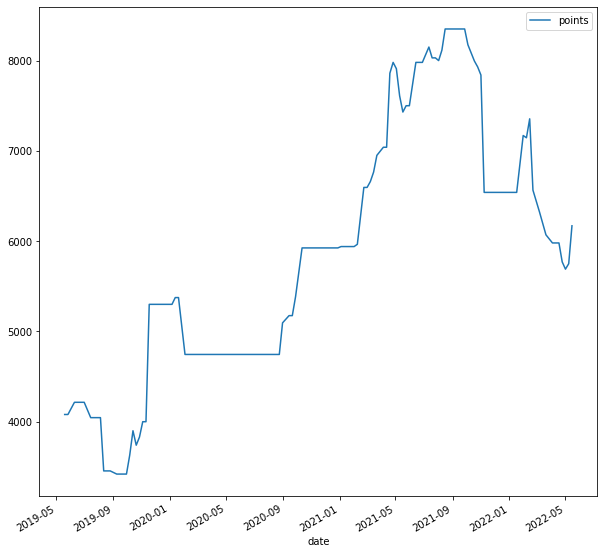

In [129]:
df_stef[['date','points']].set_index('date').plot(figsize=[10,10])

# 4.Who's the youngest player ever to reach the top 10?


In [82]:
df2 = rankings_df.copy() 

In [83]:
df3 = df2[(rankings_df['ranking'] <= 10)]

In [84]:
df3['age'].min()

17

In [86]:
df3 = df3[df3['age']== df3['age'].min()]
df3.head()


,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
318969,9,USA,Michael Chang,17,0,0,0,0,1990-02-19
319166,6,USA,Michael Chang,17,0,0,0,0,1990-02-12
319365,5,USA,Michael Chang,17,0,0,0,0,1990-02-05
319565,5,USA,Michael Chang,17,0,0,0,0,1990-01-29
319766,6,USA,Michael Chang,17,0,0,0,0,1990-01-22


In [102]:
df3.groupby(by='player')[['ranking']].count()

,ranking
player,
Aaron Krickstein,16
Bjorn Borg,1
Boris Becker,16
Mats Wilander,5
Michael Chang,34


# 5.BONUS: What's the most catastrophic ranking drop a player ever suffered from one year to another?


In [191]:
df2.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35,5525,10,0,0,2022-05-16


In [192]:
df2['year']=pd.DatetimeIndex(df2['date']).year

In [193]:
df2.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,year
0,1,SRB,Novak Djokovic,34,8660,13,0,0,2022-05-16,2022
1,2,RUS,Daniil Medvedev,26,7980,21,0,0,2022-05-16,2022
2,3,GER,Alexander Zverev,25,7200,22,125,0,2022-05-16,2022
3,4,GRE,Stefanos Tsitsipas,23,6170,25,250,45,2022-05-16,2022
4,5,ESP,Rafael Nadal,35,5525,10,0,0,2022-05-16,2022


In [195]:
df5= df2.groupby(['player','year']).agg(min_rank=('ranking','min'), max_rank=('ranking','max'))
df5

min_rank  max_rank
player           year                    
Aaron Krickstein 1983        92        97
                 1984         9        99
                 1985         7        36
                 1986        23        45
                 1987        24        62
...                         ...       ...
Zoltan Kuharszky 1982        67       128
                 1983        85       130
                 1984        53        90
                 1985        77       180
Zsombor Piros    2022       189       190

[12825 rows x 2 columns]

# 6.BONUS: For how long has Roger Federer been in the top 5 consequently every week?

In [158]:
df_Roger = rankings_df[(rankings_df['player'].str.contains('Federer')) & (rankings_df['ranking'] <= 5)]

In [159]:
df_Roger.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
11004,5,SUI,Roger Federer,39,6630,16,0,0,2021-03-01
11204,5,SUI,Roger Federer,39,6630,16,0,0,2021-02-22
11404,5,SUI,Roger Federer,39,6630,16,0,0,2021-02-08
11604,5,SUI,Roger Federer,39,6630,16,0,0,2021-02-01
11804,5,SUI,Roger Federer,39,6630,16,0,0,2021-01-25


In [162]:
df_Roger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 11004 to 184204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ranking          809 non-null    int16         
 1   country          809 non-null    object        
 2   player           809 non-null    object        
 3   age              809 non-null    Int64         
 4   points           809 non-null    int16         
 5   tournaments      809 non-null    int64         
 6   points_dropping  809 non-null    int16         
 7   next_best        809 non-null    int64         
 8   date             809 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), int16(3), int64(2), object(2)
memory usage: 49.8+ KB


In [163]:
df_Roger["time_difference"] = pd.to_timedelta(df_Roger['date'] - df_Roger['date'].shift())

/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [177]:
df_Roger.head(30)

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference
11004,5,SUI,Roger Federer,39,6630,16,0,0,2021-03-01,NaT
11204,5,SUI,Roger Federer,39,6630,16,0,0,2021-02-22,-7 days
11404,5,SUI,Roger Federer,39,6630,16,0,0,2021-02-08,-14 days
11604,5,SUI,Roger Federer,39,6630,16,0,0,2021-02-01,-7 days
11804,5,SUI,Roger Federer,39,6630,16,0,0,2021-01-25,-7 days
12004,5,SUI,Roger Federer,39,6630,16,0,0,2021-01-18,-7 days
12204,5,SUI,Roger Federer,39,6630,16,0,0,2021-01-11,-7 days
12404,5,SUI,Roger Federer,39,6630,16,0,0,2021-01-04,-7 days
12604,5,SUI,Roger Federer,39,6630,16,0,0,2020-12-28,-7 days
12804,5,SUI,Roger Federer,39,6630,16,0,0,2020-12-21,-7 days


In [180]:
x = list(df_Roger['time_difference'])

counters = {} # keep track of counts

new_list = [counters[c] for c in x if not counters.update({c:counters.get(c,-1)+1})]
counters

{NaT: 0,
 Timedelta('-7 days +00:00:00'): 753,
 Timedelta('-14 days +00:00:00'): 47,
 Timedelta('-161 days +00:00:00'): 0,
 Timedelta('-49 days +00:00:00'): 0,
 Timedelta('-217 days +00:00:00'): 0,
 Timedelta('-175 days +00:00:00'): 0,
 Timedelta('-35 days +00:00:00'): 0,
 Timedelta('-21 days +00:00:00'): 0}

In [ ]:
x = list(df_Roger['time_difference'])

counters = {} # keep track of counts

for i in range(0,len(x)):
    if x[i]==x[i-1]:
        counter +=1
    else:
        


new_list = [counters[c] for c in x if not counters.update({c:counters.get(c,-1)+1})]
counters

In [188]:
x[1]

Timedelta('-7 days +00:00:00')

In [182]:
#[x[:i].count(n) for i,n in enumerate(x)]

In [190]:
y=[]
appropriate = x[1]
for i in x:
    if i==appropriate:
        y.append(True)
    else:
        y.append(False)

In [ ]:
#y